In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("COVID-19 India Statewise Vaccine Data.csv")



In [5]:

#  Basic Info and Cleaning-
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose1                    36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Dose 1 15-18             36 non-null     int64 
 5   Dose 2 15-18             36 non-null     int64 
 6   Dose 1 12-14             36 non-null     int64 
 7   Dose 2 12-14             36 non-null     int64 
 8   Precaution 18-59         36 non-null     int64 
 9   Population               36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB
None
       Total Vaccination Doses         Dose1        Dose 2  Dose 1 15-18  \
count             3.600000e+01  3.600000e+01  3.600000e+01  3.600000e+01   
mean              6.115204e+07  2.555900e+07  2.400569

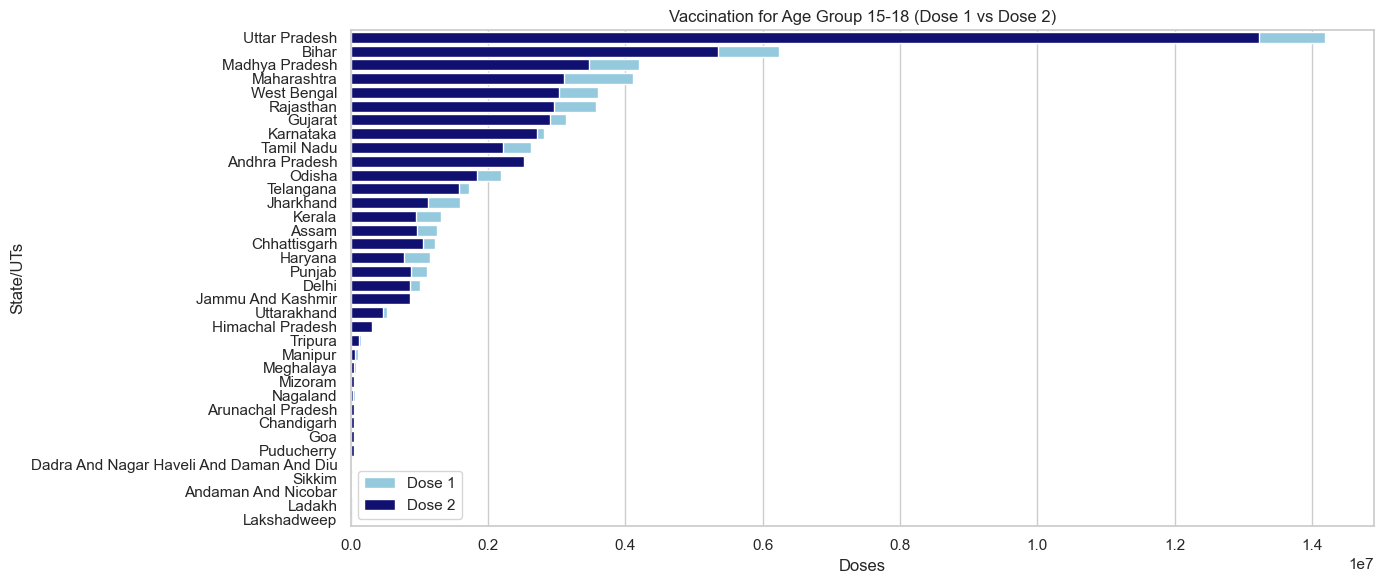

In [17]:

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


#  Age Group 15–18 Dose 1 vs Dose 2
plt.figure(figsize=(14, 6))
df_sorted_15_18 = df.sort_values(by="Dose 1 15-18", ascending=False)
sns.barplot(data=df_sorted_15_18, x="Dose 1 15-18", y="State/UTs", color="skyblue", label="Dose 1")
sns.barplot(data=df_sorted_15_18, x="Dose 2 15-18", y="State/UTs", color="navy", label="Dose 2")
plt.title("Vaccination for Age Group 15-18 (Dose 1 vs Dose 2)")
plt.xlabel("Doses")
plt.ylabel("State/UTs")
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
## **1. Age Group 15–18: Dose 1 vs Dose 2**

####  What the chart shows:
- It compares **first dose and second dose** for teenagers (15–18 years old) in each state.
- Some states gave a lot of first doses, but **fewer second doses**.

####  What we learn:
- In many states, **students didn’t come back for the second dose**.
- **Uttar Pradesh** and **Maharashtra** gave the most vaccines in this age group.

####  Why use a bar chart?
- It helps us **easily compare** two values (Dose 1 vs Dose 2) side by side for each state.

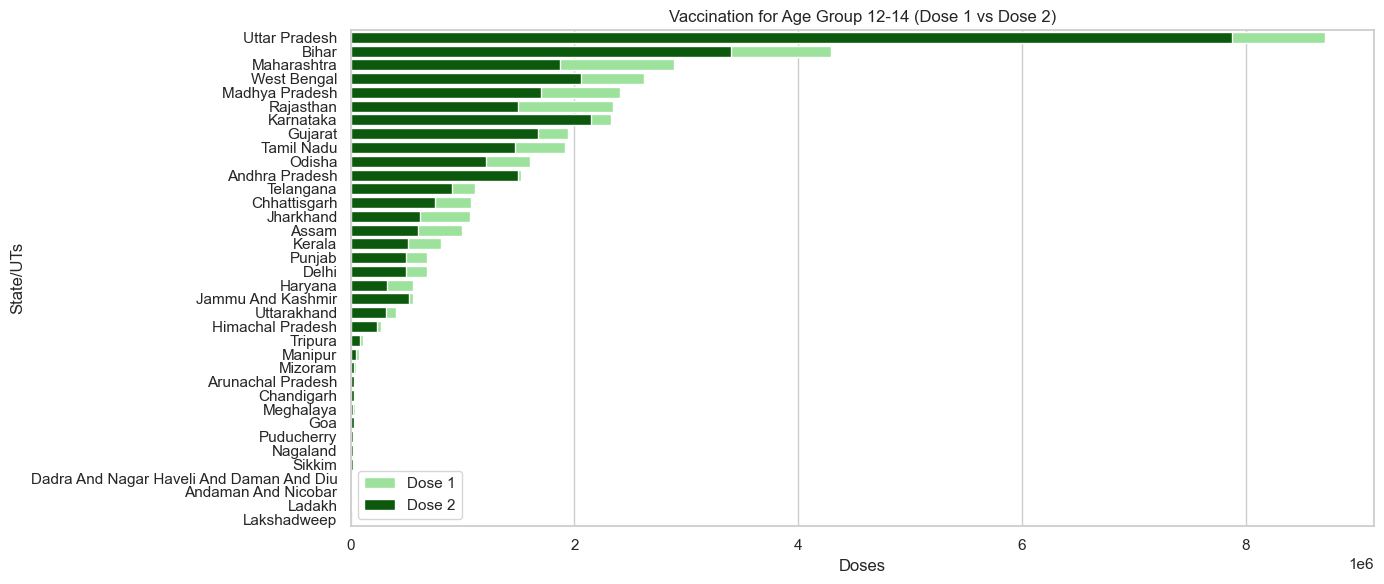

In [19]:
#  Age Group 12–14 Dose 1 vs Dose 2

plt.figure(figsize=(14, 6))
df_sorted_12_14 = df.sort_values(by="Dose 1 12-14", ascending=False)
sns.barplot(data=df_sorted_12_14, x="Dose 1 12-14", y="State/UTs", color="lightgreen", label="Dose 1")
sns.barplot(data=df_sorted_12_14, x="Dose 2 12-14", y="State/UTs", color="darkgreen", label="Dose 2")
plt.title("Vaccination for Age Group 12-14 (Dose 1 vs Dose 2)")
plt.xlabel("Doses")
plt.ylabel("State/UTs")
plt.legend()
plt.tight_layout()
plt.show()





In [ ]:
###  **2. Age Group 12–14: Dose 1 vs Dose 2**

####  What the chart shows:
- Same idea as above, but for **younger kids (12–14 years)**.
- Again, **Dose 1 is more than Dose 2** in most places.

####  What we learn:
- Some kids took the first dose but **did not complete** their second dose.
- We can **identify which states need more awareness**.

#### Why use a bar chart?
- Makes it easy to see **how much less Dose 2 is** compared to Dose 1.


C:\Users\HP\AppData\Local\Temp\ipykernel_20512\3776029822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_precaution, x="Precaution 18-59", y="State/UTs", palette="cool")


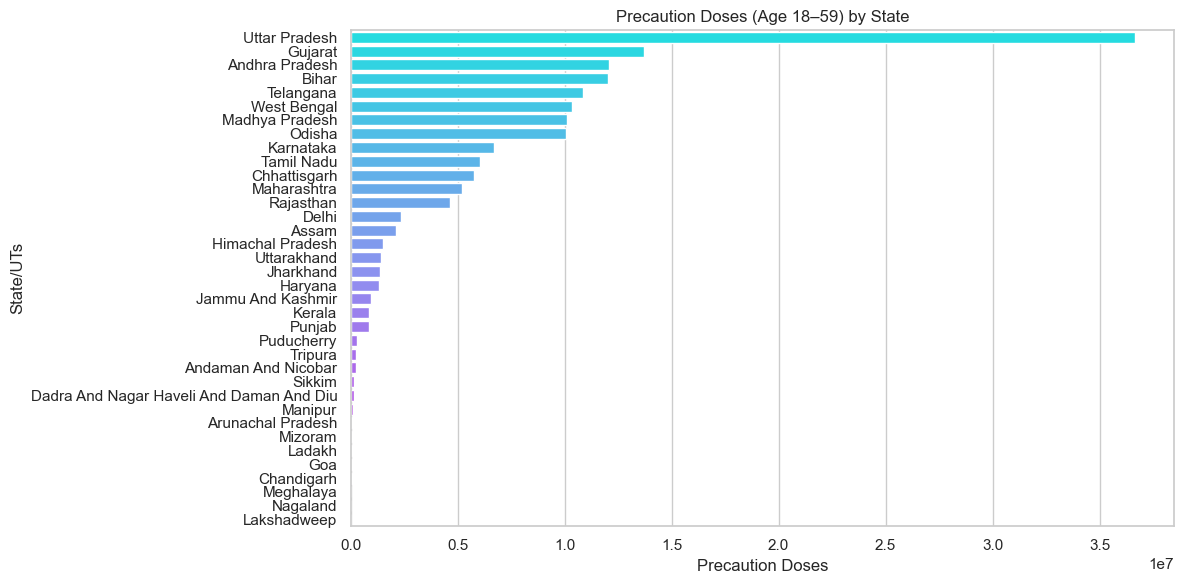

In [21]:
#  Precaution Doses (Age 18–59)

plt.figure(figsize=(12, 6))
df_sorted_precaution = df.sort_values(by="Precaution 18-59", ascending=False)
sns.barplot(data=df_sorted_precaution, x="Precaution 18-59", y="State/UTs", palette="cool")
plt.title("Precaution Doses (Age 18–59) by State")
plt.xlabel("Precaution Doses")
plt.ylabel("State/UTs")
plt.tight_layout()
plt.show()




###  **3. Precaution Dose (Age 18–59)**

####  What the chart shows:
- This shows how many **booster (precaution) doses** were given to adults between 18 and 59 years.

####  What we learn:
- **Maharashtra** and **Uttar Pradesh** gave the highest number of precaution doses.
- Some states gave **very few booster doses**, which means people might not be aware or didn't take them.

####  Why use a bar chart?
- Bar charts are great for showing **total numbers for each state** and easily spotting **top and bottom performers**.

---

### Simple Summary

| Chart                        | Shows What?                                  | What We Learn                                |
|-----------------------------|----------------------------------------------|----------------------------------------------|
| 15–18 Dose 1 vs Dose 2      | Teen vaccines                                | Many missed their second dose                |
| 12–14 Dose 1 vs Dose 2      | Kids vaccines                                | Similar pattern, lower second dose           |
| Precaution Dose (18–59)     | Adult booster dose                           | Some states gave many, others gave very few  |

---



In [7]:
# Create new feature: Vaccination per Capita
df["Vaccination per Capita"] = df["Total Vaccination Doses"] / df["Population"]



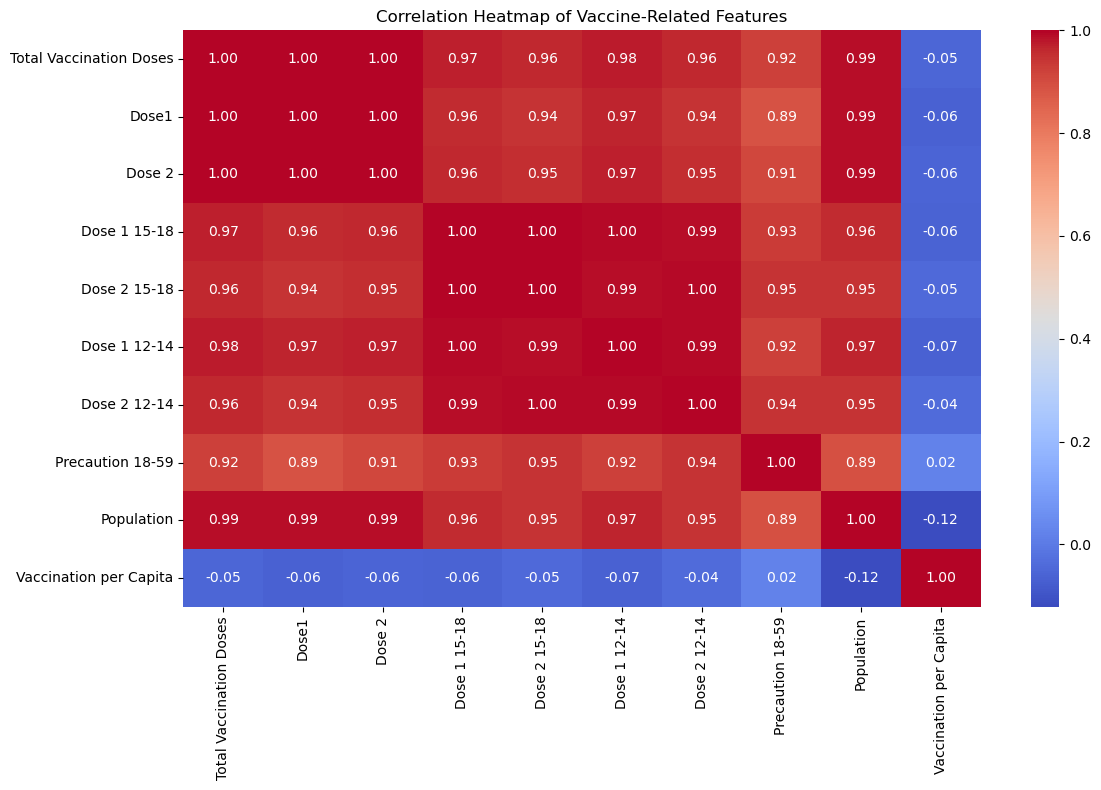

In [9]:

# 2. Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["State/UTs"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Vaccine-Related Features")
plt.tight_layout()
plt.show()

###  1. **Correlation Heatmap**

 **What it shows:**
- A color-coded grid that reveals how **strongly each feature is related** to others (values from -1 to +1).
- Brighter colors mean stronger correlation.

 **Insights:**
- **Dose1, Dose2, and Total Vaccination Doses** are **strongly correlated** — makes sense because they together make up the total.
- **Population** has a **moderate correlation** with total doses — larger states often gave more vaccines.
- **Younger age groups and precaution doses** have weaker correlation with total doses — likely due to lower coverage or different rollout strategies.

 **Why use a heatmap?**
- It's the best way to **quickly spot relationships** between numbers.
- Makes patterns and outliers visually clear using **colors**

C:\Users\HP\AppData\Local\Temp\ipykernel_20512\1653753557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Vaccination Doses", y="State/UTs", data=top_total, palette="viridis")


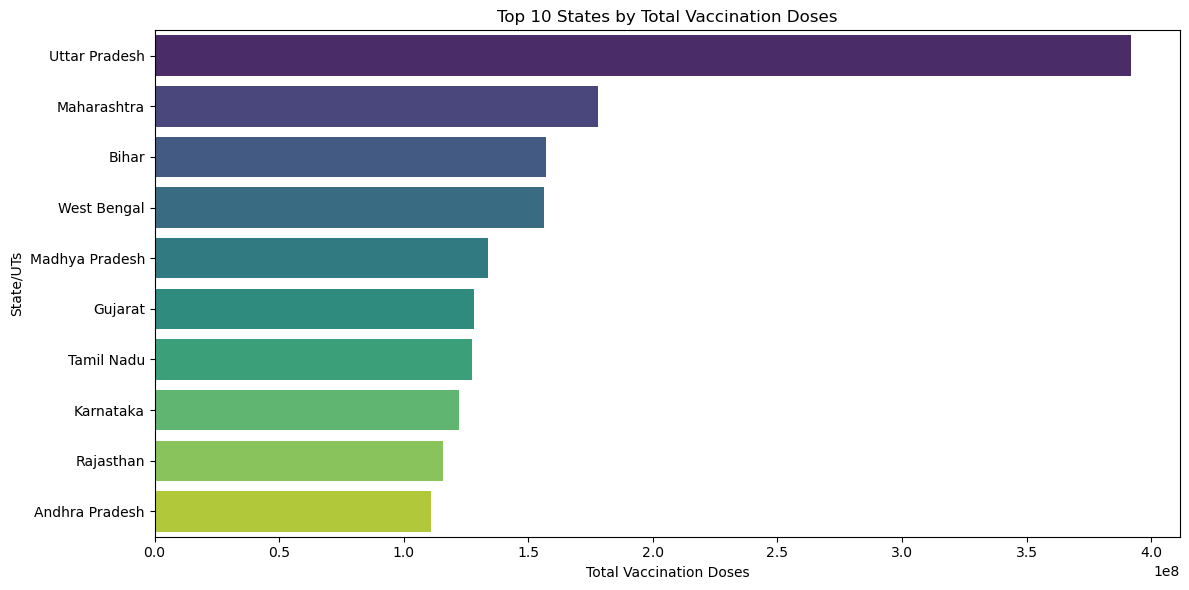

In [11]:
# 3. Top 10 States by Total Vaccination

top_total = df.sort_values("Total Vaccination Doses", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Total Vaccination Doses", y="State/UTs", data=top_total, palette="viridis")
plt.title("Top 10 States by Total Vaccination Doses")
plt.xlabel("Total Vaccination Doses")
plt.ylabel("State/UTs")
plt.tight_layout()
plt.show()



### 2. **Top 10 States by Total Vaccination Doses**

 **What it shows:**
- A **horizontal bar chart** of the top 10 states with the **highest total vaccine doses** given.

 **Insights:**
- **Uttar Pradesh, Maharashtra, West Bengal** are on top — these are **high-population states**, so they naturally administered more vaccines.
- Other large states like **Bihar, Tamil Nadu** are also in the top 10.

 **Why use a bar chart?**
- Bar charts are great for **ranking** categories.
- Horizontal bars are especially good when you have long state names — it's easier to read.

---



C:\Users\HP\AppData\Local\Temp\ipykernel_20512\892402299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vaccination per Capita", y="State/UTs", data=top_percapita, palette="magma")


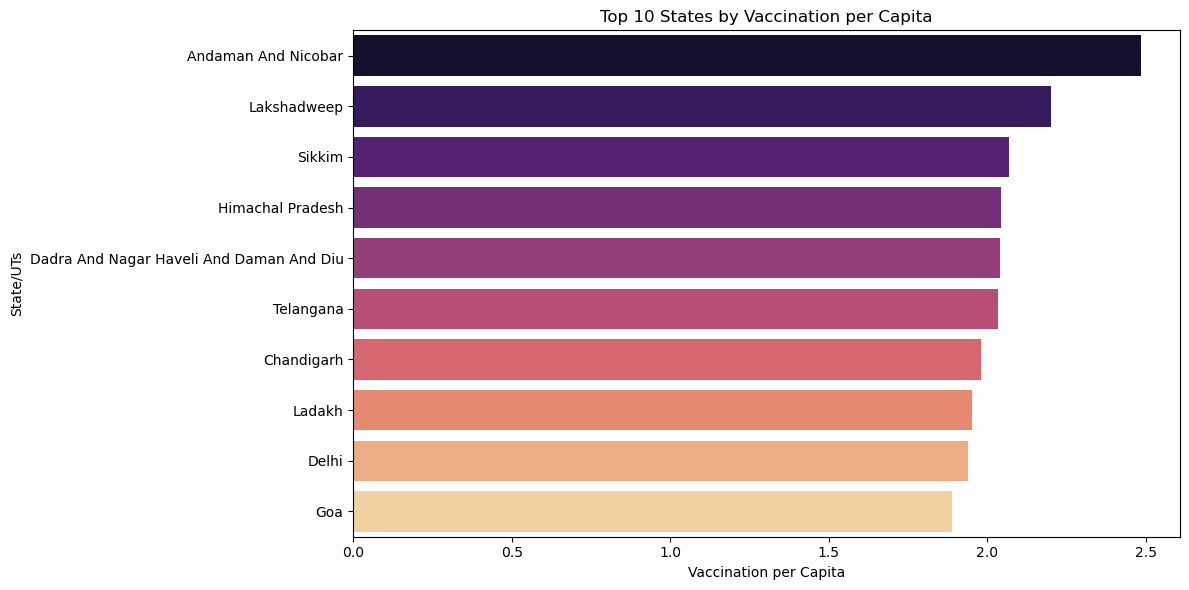

In [13]:

# 4. Top 10 States by Vaccination Per Capita

top_percapita = df.sort_values("Vaccination per Capita", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Vaccination per Capita", y="State/UTs", data=top_percapita, palette="magma")
plt.title("Top 10 States by Vaccination per Capita")
plt.xlabel("Vaccination per Capita")
plt.ylabel("State/UTs")
plt.tight_layout()
plt.show()

###  3. **Top 10 States by Vaccination per Capita**

 **What it shows:**
- States ranked by **vaccines per person** — i.e., total doses divided by population.

 **Insights:**
- Smaller or well-managed states/UTs like **Ladakh, Sikkim, Himachal Pradesh** rank high — they may have **less population but efficient distribution**.
- This gives us a **fair view**, unlike the total dose chart which favors big states.

**Why calculate per capita?**
- It's a **normalized metric** — allows small and large states to be compared equally.
- Helps reveal **efficiency** of vaccination drives.

 **Why bar chart again?**
- Great for **side-by-side comparison**.
- Highlights how well a state performed **relative to its size**.

---

###  Summary Table

| Chart                          | What it Tells Us                                | Why This Chart Type Works                         |
|-------------------------------|--------------------------------------------------|---------------------------------------------------|
| **Correlation Heatmap**       | Shows relationships between features             | Heatmaps show multiple correlations clearly using color |
| **Top 10 by Total Doses**     | Big states gave the most vaccines                | Bar charts are best for comparing totals          |
| **Top 10 by Per Capita Doses**| Smaller states sometimes did better proportionally | Bar chart reveals fairness and relative success   |

